<a href="https://colab.research.google.com/github/AYYasaswini/testmyprojectAI/blob/master/EVA3_Assignment5_ImageGallery_99_4acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


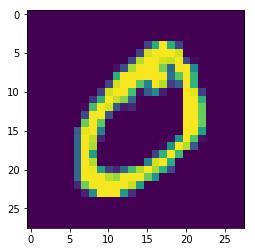

In [58]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [62]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
from keras.layers import Activation
from keras import regularizers # L2 regularization
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26 L2 regularization
model.add(BatchNormalization())
model.add(Activation('relu')) #2 ReLU after BN
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1 )) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3 ))#9
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3 ))#7
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3 ))#5
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3 ))#3
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/us

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_33 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_34 (Activation)   (None, 24, 24, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [65]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
# To save the model
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
def custom_loss(actual,predicted):
    sqr_w = 0
    lamda = 0.01 #1e-4
    batch_size =128
    for layer in model.layers:
       sqr_w += sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))

    l2_regularization = (lamda*sqr_w)/2*(batch_size)
    loss = K.categorical_crossentropy(actual,predicted) + l2_regularization

    # Return a function
    return loss
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.compile(loss=custom_loss, optimizer=Adam(lr=0.003), metrics=['accuracy'])

#1 image normalization
###########################################################################################################################################################################
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
#Run your new code for 40 epochs and save the model

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),validation_data=(X_test, Y_test), 
                    steps_per_epoch=len(X_train) / 128, epochs=40, callbacks=[checkpoint])
###########################################################################################################################################################################
 


#model.fit(X, y, epochs=15, validation_split=0.4, callbacks=[checkpoint], verbose=False)
#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


469/468 [==============================] - 16s 34ms/step - loss: 29437442048.0000 - acc: 0.8377 - val_loss: 29437442048.0000 - val_acc: 0.9801

Epoch 00001: val_loss improved from inf to 29437442048.00000, saving model to model-001-0.837683-0.980100.h5
Epoch 2/40
469/468 [==============================] - 13s 27ms/step - loss: 29437442048.0000 - acc: 0.8855 - val_loss: 29437442048.0000 - val_acc: 0.9890

Epoch 00002: val_loss did not improve from 29437442048.00000
Epoch 3/40
469/468 [==============================] - 13s 27ms/step - loss: 29437442048.0000 - acc: 0.8882 - val_loss: 29437442048.0000 - val_acc: 0.9898

Epoch 00003: val_loss did not improve from 29437442048.00000
Epoch 4/40
469/468 [==============================] - 13s 28ms/step - loss: 29437442048.0000 - acc: 0.8930 - val_loss: 29437442048.0000 - val_acc: 0.9891

Epoch 00004: val_loss did not improve from 29437442048.00000
Epoch 5/40
469/468 [==============================] - 13s 27ms/step - loss: 29437442048.0000 - acc:

In [66]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
print("Test Loss", score[0])
print("Test Accuracy", score[1])

[29437442048.0, 0.9941]
Test Loss 29437442048.0
Test Accuracy 0.9941


In [67]:

predicted_classes = model.predict_classes(X_test)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [68]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")
incorrect_indices


9941  classified correctly
59  classified incorrectly


array([ 115,  321,  340,  659,  947, 1014, 1232, 1242, 1247, 1260, 1299,
       1530, 1737, 1790, 1878, 1901, 2035, 2130, 2293, 2447, 2462, 2597,
       2654, 2771, 2896, 2995, 3030, 3422, 3448, 3520, 3558, 3762, 4176,
       4201, 4289, 4443, 4571, 4662, 4699, 4761, 4823, 4874, 5937, 6555,
       6571, 6576, 6597, 6625, 8061, 8287, 8326, 8408, 8527, 9015, 9638,
       9642, 9698, 9729, 9792])

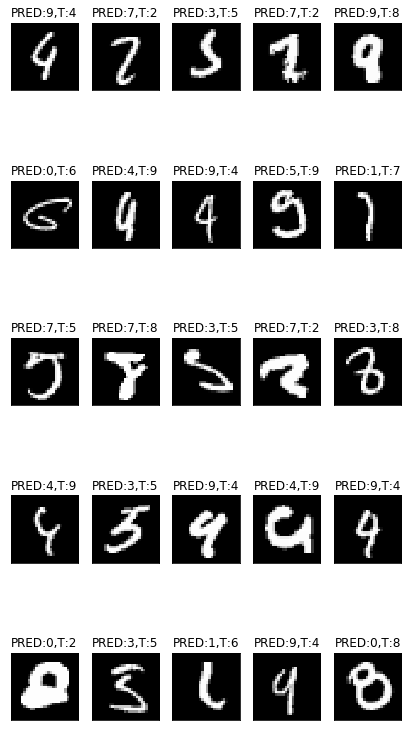

In [69]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 25 correct predictions
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "PRED:{},T:{}".format(predicted_classes[incorrect],
                                        y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
    